
# Problems
1.how do differnt times affects grades of students

2.how to multiple factors affected grades of students

3.what is the relation between each category 
# motive 
to get thorogh idea of about how to make multiple regression on datasets
And  make my self comfortable in using regression models also saving models with the help of pickle for further predictions..


# performing EDA on DataSet

# libraries needed

In [1]:
'''for EDA'''
import pandas as pd 
import numpy as np 
from scipy import stats as st
'''for visualisation purposes'''
import matplotlib.pyplot as plt
import seaborn as sns

# importing Data

In [2]:
dataset=pd.read_csv('student-mat.csv',sep=';')
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)

dataset.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [3]:
dataset=dataset.select_dtypes(exclude=['object'])

In [4]:
dataset.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [5]:
dataset.isnull().sum()

age           0
Medu          0
Fedu          0
traveltime    0
studytime     0
failures      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [6]:
dataset.traveltime.unique()

array([2, 1, 3, 4], dtype=int64)

# Hooray no missing values !!!!

# Lets Check For Outliers In The Dataset

sns.pairplot(dataset)

# Observations From The Pairplot
1.there is very less data for students of age 20-22 hence behaving as outliers
2.many Features are having a negative correlation with each other

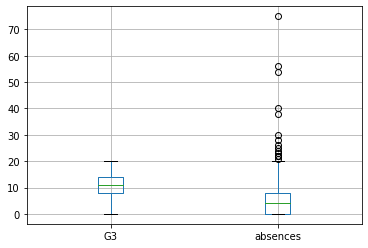

In [7]:
dataset[['G3','absences']].boxplot()

# To find out outliers in the dataset we have to covert features to arrays then apply zscore to them 

### this graph shows a dark spot near origin clearly showing that it is an outlier of the dataset

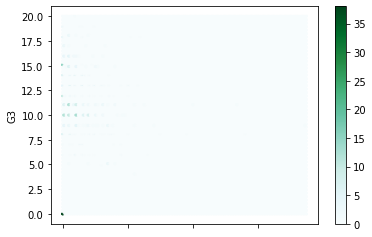

In [8]:
dataset.plot(y='G3',x='absences',kind='hexbin')

# no of zeroes in the G3 and absences in the columns

In [9]:
dataset[(dataset['G3']==0)&(dataset['absences']==0)].shape

(38, 16)

# as evident from above we can say that 38 people have 0 absences still having 0 marks in the "G3" which is not possible 
### this means that these values are outliers 
##### also these values lead to wrong calculations in the absences column....
##### hence we replace them from mean values

In [10]:
dataset.loc[(dataset['G3']==0)&(dataset['absences']==0),['G3','absences']]

,G3,absences
128,0,0
130,0,0
131,0,0
134,0,0
135,0,0
136,0,0
137,0,0
140,0,0
144,0,0
146,0,0


# failed attempt 
dataset.loc[(dataset['G3']==0)&(dataset['absences']==0),['G3','absences']].replace(0,np.mean[dataset[['G3','absences']]])

# success

In [11]:
dataset.loc[(dataset['G3']==0)&(dataset['absences']==0),['G3', 'absences']] = [dataset.loc[(dataset['G3']!=0)]['G3'].mean(), dataset.loc[(dataset['absences']!=0)]['absences'].mean()]

# now there are no zeroes all the outliers got replaced

In [12]:
dataset.loc[(dataset['G3']==0)&(dataset['absences']==0),['G3', 'absences']]

,G3,absences


now its not there meaning that now its no longer an outlier

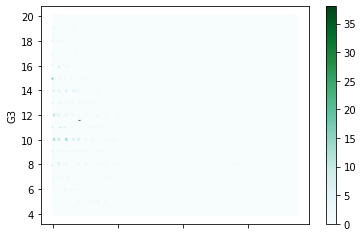

In [13]:
dataset.plot(y='G3',x='absences',kind='hexbin')

The values in the absences columns are okay since these can vary from student to student and depend on other columns too

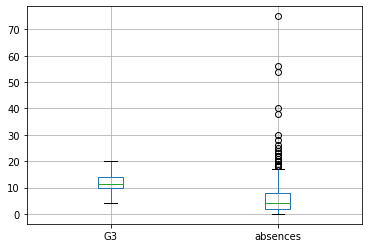

In [14]:
dataset[['G3','absences']].boxplot()

In [15]:
dataset[['G3']].mean()

G3    11.52381
dtype: float64

# till now the data we worked with data with dropped categorical features now we will do work with categorical data tooo by creating a new DF 

In [32]:
'''for EDA'''
import pandas as pd 
import numpy as np 
from scipy import stats as st
'''for visualisation purposes'''
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)

In [3]:
new_df=pd.read_csv('student-mat.csv',sep=';')

In [4]:
obj_copy=new_df.select_dtypes(include='object').copy()

new_df.loc[(new_df['absences']!=0)]['absences'].mean()

In [12]:
obj_copy[['school','sex']]

,school,sex
0,GP,F
1,GP,F
2,GP,F
3,GP,F
4,GP,F
...,...,...
390,MS,M
391,MS,M
392,MS,M
393,MS,M


### experimenting how to increse the index counting and start it from 1

In [16]:
obj_copy.index=obj_copy.index.map(lambda x: x+1)

### success

In [17]:
obj_copy.head()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
1,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
2,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
3,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
4,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
5,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no


In [30]:
manipulated_df=pd.get_dummies(obj_copy,columns=['sex','Pstatus','activities','internet','romantic'],drop_first=True)

# how to transpose a dataframe??

In [20]:
obj_copy.T

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,...,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395
school,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,...,MS,MS,MS,MS,MS,MS,MS,MS,MS,MS,MS,MS,MS,MS,MS,MS,MS,MS,MS,MS,MS,MS,MS,MS,MS
sex,F,F,F,F,F,M,M,F,M,M,F,F,M,M,M,F,F,F,M,M,M,M,M,M,F,...,F,M,F,F,F,F,F,F,F,F,M,M,M,M,M,F,F,F,F,F,M,M,M,M,M
address,U,U,U,U,U,U,U,U,U,U,U,U,U,U,U,U,U,U,U,U,U,U,U,U,R,...,U,R,U,R,R,R,U,R,U,R,U,R,U,R,R,R,R,R,U,U,U,U,R,R,U
famsize,GT3,GT3,LE3,GT3,GT3,LE3,LE3,GT3,LE3,GT3,GT3,GT3,LE3,GT3,GT3,GT3,GT3,GT3,GT3,LE3,GT3,GT3,LE3,LE3,GT3,...,LE3,LE3,GT3,GT3,LE3,GT3,GT3,LE3,GT3,GT3,GT3,GT3,GT3,GT3,GT3,GT3,GT3,GT3,LE3,GT3,LE3,LE3,GT3,LE3,LE3
Pstatus,A,T,T,T,T,T,T,A,A,T,T,T,T,T,A,T,T,T,T,T,T,T,T,T,T,...,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,A,T,T,T,T
Mjob,at_home,at_home,at_home,health,other,services,other,other,services,other,teacher,services,health,teacher,other,health,services,other,services,health,teacher,health,teacher,other,services,...,services,at_home,other,other,other,other,health,teacher,other,at_home,teacher,other,other,other,other,at_home,teacher,services,teacher,other,services,services,other,services,other
Fjob,teacher,other,other,services,other,other,other,teacher,other,other,health,other,services,other,other,other,services,other,services,other,other,health,other,other,health,...,services,services,at_home,other,other,other,other,services,other,other,teacher,other,services,services,other,other,at_home,other,services,other,services,services,other,other,at_home
reason,course,course,other,home,home,reputation,home,home,home,home,reputation,reputation,course,course,home,home,reputation,reputation,course,home,reputation,other,course,reputation,course,...,home,other,home,course,reputation,home,course,course,home,reputation,home,other,home,other,home,other,reputation,course,course,course,course,course,course,course,course
guardian,mother,father,mother,mother,father,mother,mother,mother,mother,mother,mother,father,father,mother,other,mother,mother,mother,mother,father,mother,father,mother,mother,mother,...,other,father,mother,mother,mother,mother,other,mother,mother,mother,father,mother,father,mother,father,mother,mother,mother,mother,mother,other,mother,other,mother,father
schoolsup,yes,no,yes,no,no,no,no,yes,no,no,no,no,no,no,no,no,no,yes,no,no,no,no,no,no,yes,...,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no


In [26]:
pd.get_dummies(obj_copy,columns=['Pstatus','reason'],drop_first=True)

,school,sex,address,famsize,Mjob,Fjob,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,Pstatus_T,reason_home,reason_other,reason_reputation
1,GP,F,U,GT3,at_home,teacher,mother,yes,no,no,no,yes,yes,no,no,0,0,0,0
2,GP,F,U,GT3,at_home,other,father,no,yes,no,no,no,yes,yes,no,1,0,0,0
3,GP,F,U,LE3,at_home,other,mother,yes,no,yes,no,yes,yes,yes,no,1,0,1,0
4,GP,F,U,GT3,health,services,mother,no,yes,yes,yes,yes,yes,yes,yes,1,1,0,0
5,GP,F,U,GT3,other,other,father,no,yes,yes,no,yes,yes,no,no,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,MS,M,U,LE3,services,services,other,no,yes,yes,no,yes,yes,no,no,0,0,0,0
392,MS,M,U,LE3,services,services,mother,no,no,no,no,no,yes,yes,no,1,0,0,0
393,MS,M,R,GT3,other,other,other,no,no,no,no,no,yes,no,no,1,0,0,0
394,MS,M,R,LE3,services,other,mother,no,no,no,no,no,yes,yes,no,1,0,0,0


In [28]:
help(obj_copy.ffill)

Help on method ffill in module pandas.core.generic:

ffill(axis=None, inplace: bool = False, limit=None, downcast=None) -> Union[~FrameOrSeries, NoneType] method of pandas.core.frame.DataFrame instance
    Synonym for :meth:`DataFrame.fillna` with ``method='ffill'``.
    
    Returns
    -------
    %(klass)s or None
        Object with missing values filled or None if ``inplace=True``.



In [31]:
manipulated_df

,school,address,famsize,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,nursery,higher,sex_M,Pstatus_T,activities_yes,internet_yes,romantic_yes
1,GP,U,GT3,at_home,teacher,course,mother,yes,no,no,yes,yes,0,0,0,0,0
2,GP,U,GT3,at_home,other,course,father,no,yes,no,no,yes,0,1,0,1,0
3,GP,U,LE3,at_home,other,other,mother,yes,no,yes,yes,yes,0,1,0,1,0
4,GP,U,GT3,health,services,home,mother,no,yes,yes,yes,yes,0,1,1,1,1
5,GP,U,GT3,other,other,home,father,no,yes,yes,yes,yes,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,MS,U,LE3,services,services,course,other,no,yes,yes,yes,yes,1,0,0,0,0
392,MS,U,LE3,services,services,course,mother,no,no,no,no,yes,1,1,0,1,0
393,MS,R,GT3,other,other,course,other,no,no,no,no,yes,1,1,0,0,0
394,MS,R,LE3,services,other,course,mother,no,no,no,no,yes,1,1,0,1,0


In [21]:
num_df=new_df.select_dtypes(include=np.number).copy()

In [22]:
num_df.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10


In [23]:
DATA=pd.concat([num_df.loc[:,'age':'absences'],manipulated_df.loc[:,'sex_M':]],axis=1)

In [24]:
Grades=num_df[['G1','G2','G3']]
DATA=pd.concat([DATA,Grades],axis=1)

In [25]:
DATA

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,sex_M,Pstatus_T,activities_yes,internet_yes,romantic_yes,G1,G2,G3
0,18,4,4,2,2,0,4,3,4,1,1,3,6,0,0,0,0,0,5,6,6
1,17,1,1,1,2,0,5,3,3,1,1,3,4,0,1,0,1,0,5,5,6
2,15,1,1,1,2,3,4,3,2,2,3,3,10,0,1,0,1,0,7,8,10
3,15,4,2,1,3,0,3,2,2,1,1,5,2,0,1,1,1,1,15,14,15
4,16,3,3,1,2,0,4,3,2,1,2,5,4,0,1,0,0,0,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,5,5,4,4,5,4,11,1,0,0,0,0,9,9,9
391,17,3,1,2,1,0,2,4,5,3,4,2,3,1,1,0,1,0,14,16,16
392,21,1,1,1,1,3,5,5,3,3,3,3,3,1,1,0,0,0,10,8,7
393,18,3,2,3,1,0,4,4,1,3,4,5,0,1,1,0,1,0,11,12,10


In [55]:
help(DATA.corrwith()

Help on method corrwith in module pandas.core.frame:

corrwith(other, axis=0, drop=False, method='pearson') -> pandas.core.series.Series method of pandas.core.frame.DataFrame instance
    Compute pairwise correlation.
    
    Pairwise correlation is computed between rows or columns of
    DataFrame with rows or columns of Series or DataFrame. DataFrames
    are first aligned along both axes before computing the
    correlations.
    
    Parameters
    ----------
    other : DataFrame, Series
        Object with which to compute correlations.
    axis : {0 or 'index', 1 or 'columns'}, default 0
        The axis to use. 0 or 'index' to compute column-wise, 1 or 'columns' for
        row-wise.
    drop : bool, default False
        Drop missing indices from result.
    method : {'pearson', 'kendall', 'spearman'} or callable
        Method of correlation:
    
        * pearson : standard correlation coefficient
        * kendall : Kendall Tau correlation coefficient
        * spearman :

### We see Many Features are not of any USE for EDA so we Drop them

In [43]:
DATA.drop(columns=['famrel','failures','Medu','Fedu','absences'],inplace=True)

### handling of outliers

#### was helpful but absences is not needed anymore so deleted it

DATA.loc[(DATA['G3']==0)&(DATA['absences']==0),['G3', 'absences']] = [DATA.loc[(DATA['G3']!=0)]['G3'].mean(), DATA.loc[(DATA['absences']!=0)]['absences'].mean()]

In [56]:
DATA.age.value_counts()

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

In [65]:
DATA.drop(DATA.loc[(DATA['age']==20)|(DATA['age']==22)|(DATA['age']==21)].index,inplace=True)

In [68]:
DATA.age.value_counts()

16    104
17     98
18     82
15     82
19     24
Name: age, dtype: int64

In [45]:
DATA.head()

,age,traveltime,studytime,freetime,goout,Dalc,Walc,health,sex_M,Pstatus_T,activities_yes,internet_yes,romantic_yes,G1,G2,G3
0,18,2,2,3,4,1,1,3,0,0,0,0,0,5,6,6
1,17,1,2,3,3,1,1,3,0,1,0,1,0,5,5,6
2,15,1,2,3,2,2,3,3,0,1,0,1,0,7,8,10
3,15,1,3,2,2,1,1,5,0,1,1,1,1,15,14,15
4,16,1,2,3,2,1,2,5,0,1,0,0,0,6,10,10


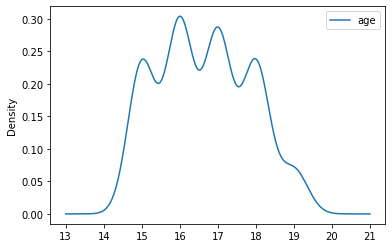

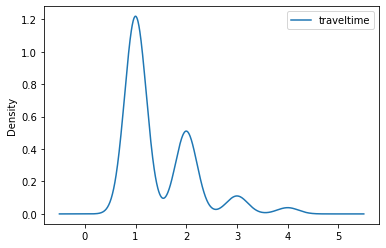

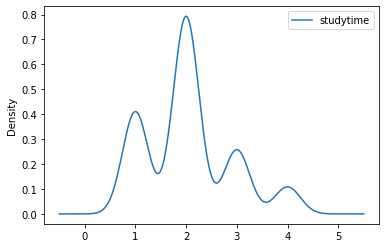

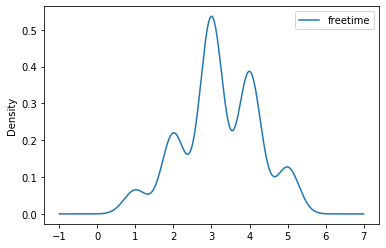

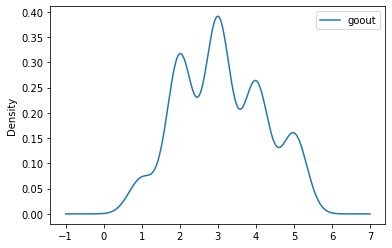

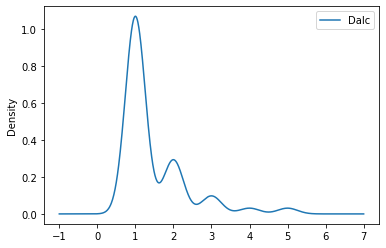

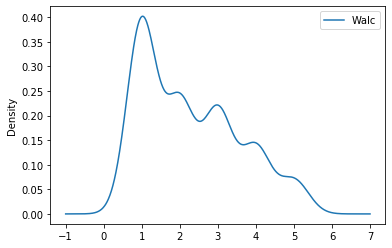

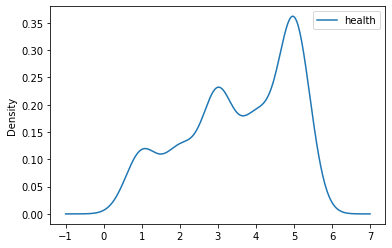

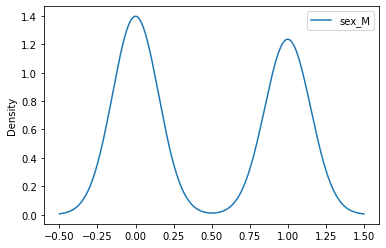

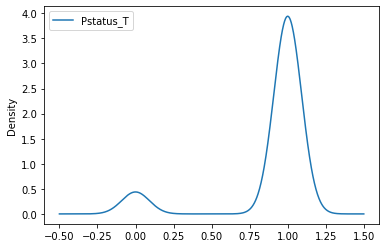

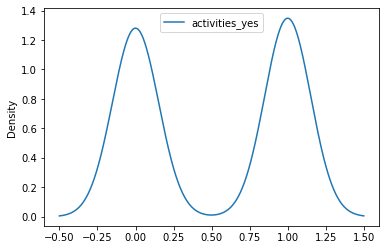

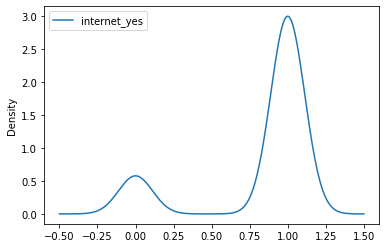

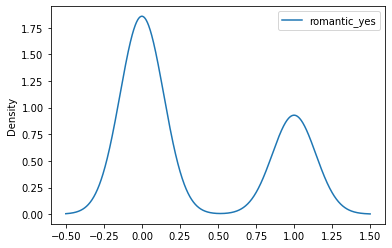

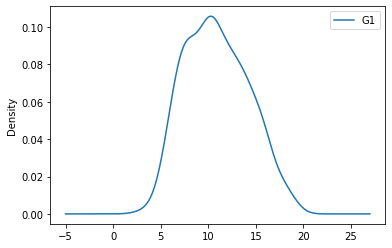

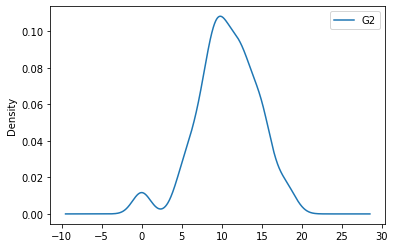

In [71]:
def plotter(df,compare_with,typo):
    '''
    takes in all column names and creates a graph between their relation with each other 
    '''
    for feature in df.columns:
        if not feature==compare_with:
            df.plot(compare_with,feature,kind=typo)
            
        else:
            pass 
plotter(DATA,'G3','kde')

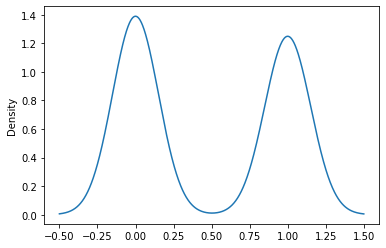

In [53]:
DATA.sex_M.plot(kind='kde')


###### people with average no of outings do have a high chance of scoring good marks telling that its healthy and effects positively on brain

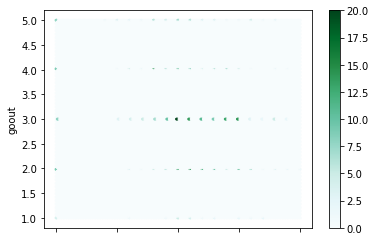

In [49]:
DATA.plot(x='G3',y='goout',kind='hexbin')